In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

In [3]:
path = "Placement_Data_Full_Class.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [12]:
print("duplicates: ", df.duplicated(keep=False).sum())
print("imbalance count: \n", df['status'].value_counts())
print("\nimbalance ratio:\n", df['status'].value_counts(normalize=True))

duplicates:  0
imbalance count: 
 status
Placed        148
Not Placed     67
Name: count, dtype: int64

imbalance ratio:
 status
Placed        0.688372
Not Placed    0.311628
Name: proportion, dtype: float64


In [14]:
df.drop(["sl_no", "salary"], axis=1, inplace=True)

In [16]:
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["status"], shuffle=True)

In [21]:
y_train = df_train["status"]
x_train = df_train.drop(["status"], axis=1)

y_test = df_test["status"]
x_test = df_test.drop(["status"], axis=1)

In [29]:
#gender	ssc_p	ssc_b	hsc_p	hsc_b	hsc_s	degree_p	degree_t	workex	etest_p	specialisation	mba_p	status
cat_cols = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation",]
num_cols = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]

preprocessing = ColumnTransformer([
	("cat", OneHotEncoder(), cat_cols), 
	("num", MinMaxScaler(), num_cols)
])

In [30]:
pipe = Pipeline([
	("preprocessing", preprocessing),
	("rf", RandomForestClassifier())
])

In [31]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'ssc_b', 'hsc_b',
                                                   'hsc_s', 'degree_t',
                                                   'workex',
                                                   'specialisation']),
                                                 ('num', MinMaxScaler(),
                                                  ['ssc_p', 'hsc_p', 'degree_p',
                                                   'etest_p', 'mba_p'])])),
                ('rf', RandomForestClassifier())])

In [35]:
pipe.score(x_test, y_test)

0.813953488372093

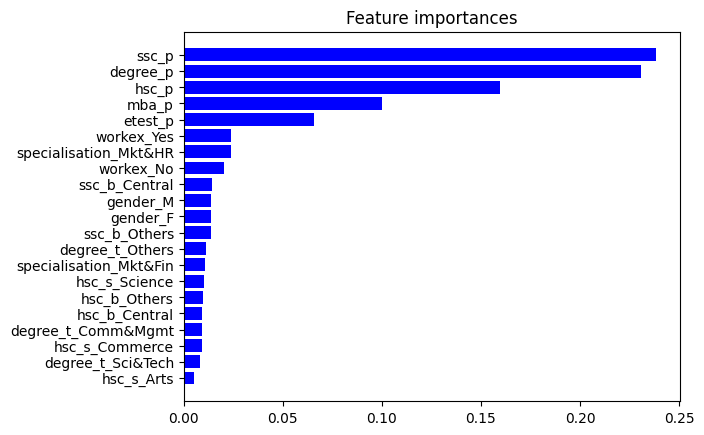

In [41]:
feature_importance = pipe["rf"].feature_importances_
feature_names = pipe["preprocessing"].get_feature_names_out()
feature_names = [name.replace("cat__", "") for name in feature_names]
feature_names = np.array([name.replace("num__", "") for name in feature_names])

sorted_idx = feature_importance.argsort()


#Plot the feature importance
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx], color='blue')
plt.title("Feature importances")
plt.show()